In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("../data/weather_data.csv")
df.head(5)

,station_id,month,humidity,pressure_hpa,wind_speed_kmh,cloud_cover_pct,uv_index,season,region,temperature_max
0,0,7,NaN,994.282458,75.444488,80.500292,5.919808,winter,west,35.305627
1,1,12,47.909469,1001.840525,40.906204,80.794079,3.775980,fall,south,9.546231
2,2,2,78.853544,NaN,78.099496,51.532556,4.059740,fall,south,23.280685
3,3,12,35.514957,1019.108102,6.466882,28.580138,4.119464,winter,center,27.551453
4,4,4,66.006032,994.706432,48.588467,5.393070,10.861895,fall,north,25.986319


In [3]:
df_clean = df.drop(["station_id"], axis=1).dropna()

In [4]:
num_columns = df_clean.select_dtypes(include=np.number).columns.to_list()
print(num_columns)
cat_columns = df_clean.select_dtypes(include="object").columns.to_list()
print(cat_columns)

['month', 'humidity', 'pressure_hpa', 'wind_speed_kmh', 'cloud_cover_pct', 'uv_index', 'temperature_max']
['season', 'region']


/tmp/ipykernel_12902/3670212462.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_clean[num_columns].hist(ax=axes)


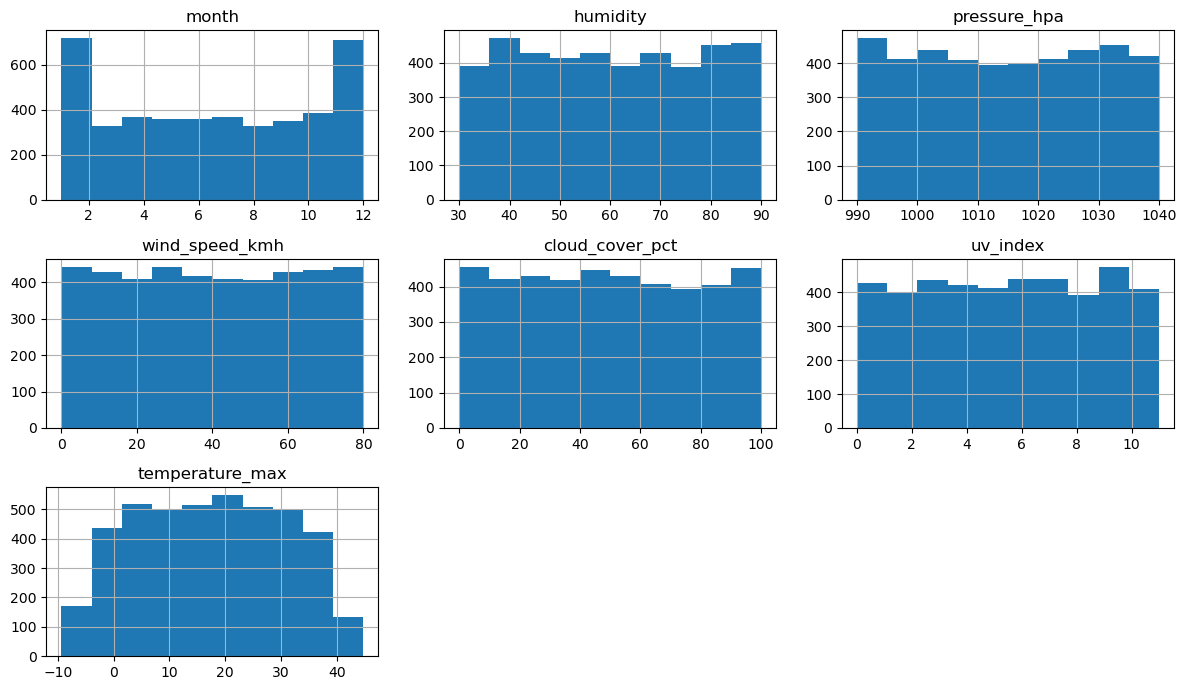

In [31]:
fig, axes = plt.subplots(1,1,figsize=(12,7))
df_clean[num_columns].hist(ax=axes)
plt.tight_layout()

In [8]:
df_corr = df_clean[num_columns].corr(method="spearman")
df_corr.head(10)

,month,humidity,pressure_hpa,wind_speed_kmh,cloud_cover_pct,uv_index,temperature_max
month,1.000000,0.011022,-0.010567,-0.003550,-0.032114,-0.001888,-0.011984
humidity,0.011022,1.000000,-0.006686,-0.013229,0.025124,0.008363,-0.016038
pressure_hpa,-0.010567,-0.006686,1.000000,0.004094,0.004821,0.000373,0.008467
wind_speed_kmh,-0.003550,-0.013229,0.004094,1.000000,0.005969,-0.022853,-0.003832
cloud_cover_pct,-0.032114,0.025124,0.004821,0.005969,1.000000,0.025432,0.002856
uv_index,-0.001888,0.008363,0.000373,-0.022853,0.025432,1.000000,0.000665
temperature_max,-0.011984,-0.016038,0.008467,-0.003832,0.002856,0.000665,1.000000


- 👎 Aucune corrélation entre les features numériques.
- 👍 Aucune corrélation avec la target

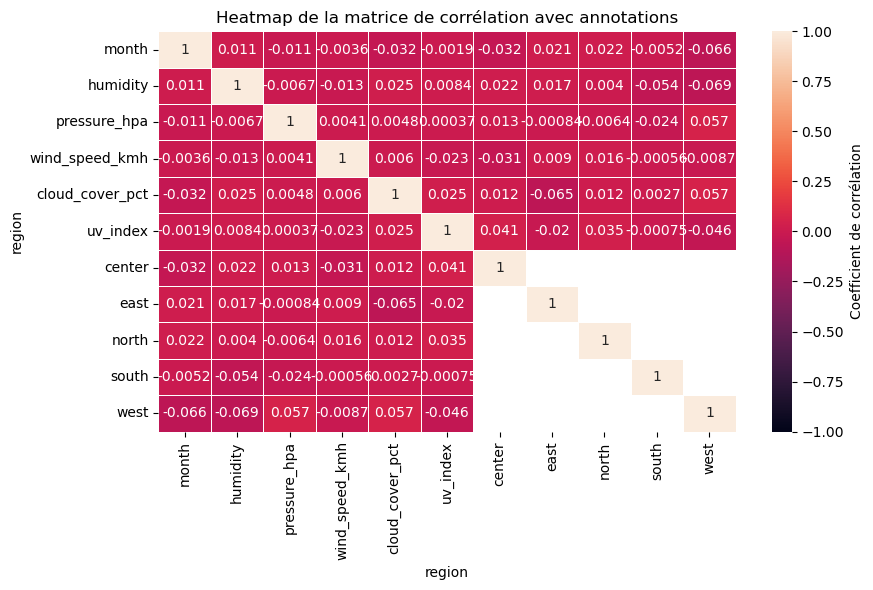

In [25]:
df_pivot = df_clean.pivot_table(
    columns="region",
    index=["month", "humidity", "pressure_hpa", "wind_speed_kmh", "cloud_cover_pct", "uv_index"],
    values="temperature_max",
    aggfunc="mean",
).reset_index()

plt.figure(figsize=(9,6))
plt.title("Heatmap de la matrice de corrélation avec annotations")
sns.heatmap(
    df_pivot.corr(method="spearman"),
    annot=True,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'label': 'Coefficient de corrélation'},
)
plt.tight_layout()

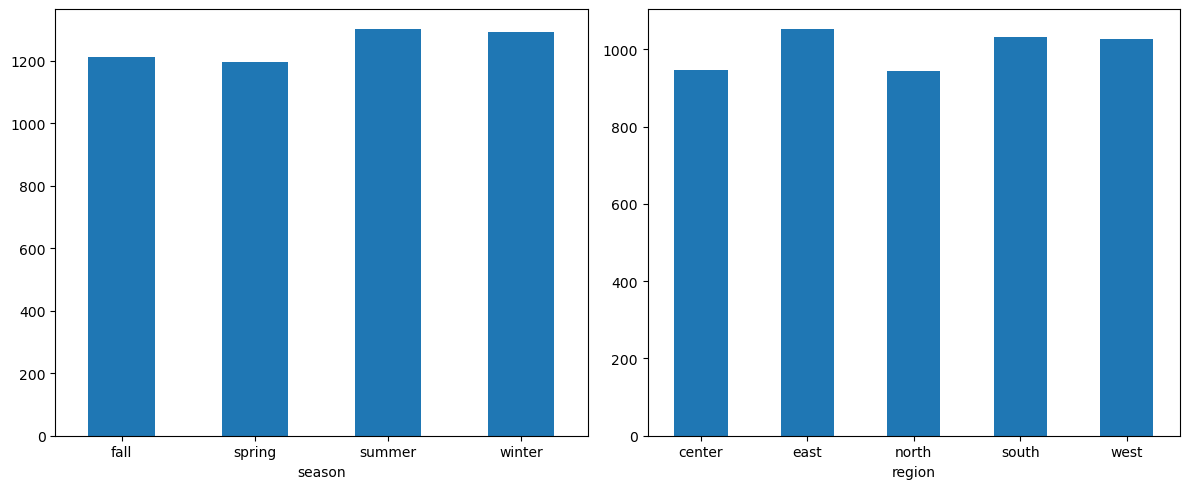

In [32]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
df.groupby("season").size().plot.bar(rot=0, ax=axes[0])
df.groupby("region").size().plot.bar(rot=0, ax=axes[1])
plt.tight_layout()